In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function


from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

/Users/ozymandias1/anaconda2/envs/python3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


(8, 8) (160, 160)


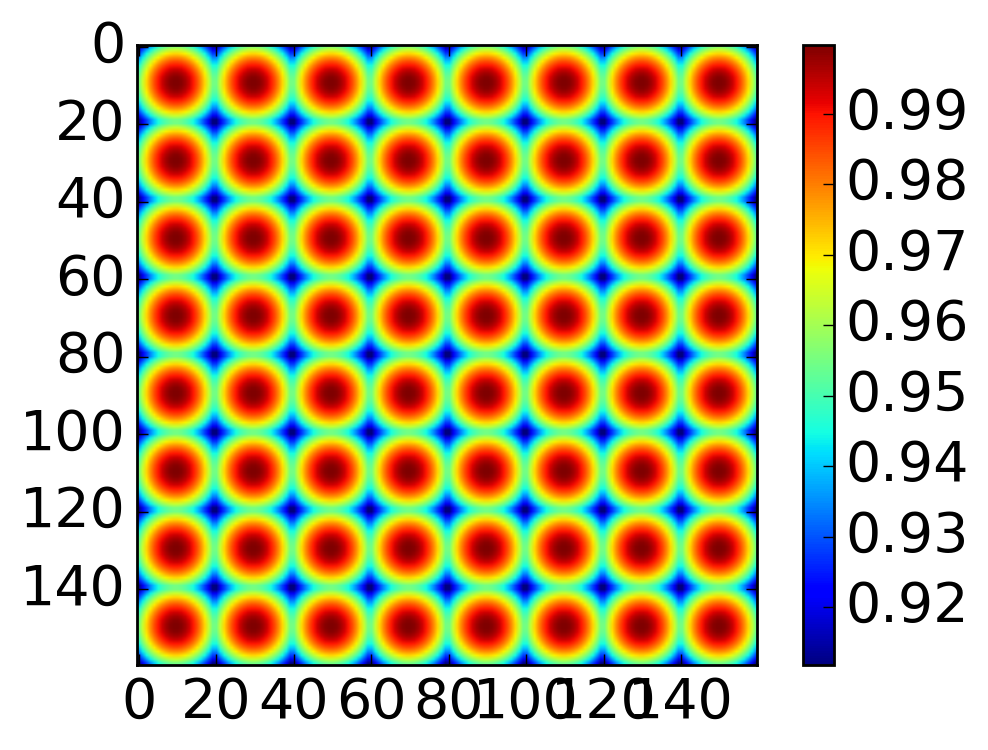

In [2]:
np.random.seed(142610)

X = np.arange(-4, 4, 1.0)
Y = np.arange(-4, 4, 1.0)
N = len(X)
X, Y = np.meshgrid(X, Y)

ss = 20

Xmod = np.arange(-4, 4, 1.0/ss)
M = len(Xmod)
Ymod = np.arange(-4, 4, 1.0/ss)

Xmod, Ymod = np.meshgrid(Xmod, Ymod)

print(np.shape(X), np.shape(Xmod))

X_r = np.arange(-4, 4, 1.0/ss)
Y_r = np.arange(-4, 4, 1.0/ss)
Xpos = X_r + 0.5/ss - 0.5
Ypos = Y_r + 0.5/ss - 0.5


Xpos, Ypos = np.meshgrid(Xpos, Ypos)


modposx = -1*np.abs(np.mod(Xpos+0.5, 1)-0.5)
modposy = -1*np.abs(np.mod(Ypos+0.5, 1)-0.5)



Resp =  -0.20 * modposx**2 - 0.00 * modposx + 1.0
Resp *= -0.20 * modposy**2 - 0.00 * modposy + 1.0

#print(modposy[:,0])

plt.imshow(Resp)
plt.colorbar()


In [3]:
mu = 1.0
sigma_x = 0.4
sigma_y = 0.2

nframes= 50



pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

xpos = np.zeros(nframes)+np.random.normal(0, 0.3, nframes) + np.linspace(0, 0.4, nframes)
ypos = np.zeros(nframes)+np.random.normal(0, 0.3, nframes) + np.linspace(0, 0.4, nframes)

# with apologies to the Python gods for what I'm about to do
fluxval = np.array([0.9999999999980113, 0.9999999999945702, 0.999999999985215, 0.9999999999597857, 0.9999999998906612, 0.9999999997027632, 0.9999999991920029, 0.9999999978036155, 0.9999999940296089, 0.9999999837709397, 0.9999999558860818, 0.9999998800952664, 0.9999996741342091, 0.9999991147150403, 0.9999975973072363, 0.9999934964353527, 0.9999825224734992, 0.9999539154186793, 0.9998841683582055, 0.9997386647420853, 0.9995141409302988, 0.9992896171206892, 0.9991441135134577, 0.9990743664782427, 0.9990457594924832, 0.999034785718504, 0.9990306853573729, 0.999029169337952, 0.9990286136927911, 0.999028417990402, 0.9990283700844442, 0.999028417990402, 0.9990286136927911, 0.999029169337952, 0.9990306853573729, 0.999034785718504, 0.9990457594924832, 0.9990743664782427, 0.9991441135134577, 0.9992896171206892, 0.9995141409302988, 0.9997386647420841, 0.9998841683582055, 0.9999539154186793, 0.9999825224734992, 0.9999934964353527, 0.9999975973072363, 0.9999991147150403, 0.9999996741342091, 0.9999998800952664, 0.9999999558860818, 0.9999999837709397, 0.9999999940296089, 0.9999999978036155, 0.9999999991920029, 0.9999999997027632, 0.9999999998906612, 0.9999999999597857, 0.999999999985215, 0.9999999999945702, 0.9999999999980113, 0.9999999999992774, 0.9999999999997429, 0.9999999999999144, 0.999999999999978])
fluxval = fluxval[0:nframes]

In [4]:
Z_first = np.zeros((nframes, M, M))
Z = np.zeros((nframes, N,N))
for i in range(nframes):
    Z_first[i] = 12*fluxval[i]*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod-xpos[i])**2/(2*sigma_x**2)
         + (Ymod-ypos[i])**2/(2*sigma_y**2))))
    '''
    Z_first[i] += 12*fluxval[i]*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod-xpos[i]-0.8)**2/(2*sigma_x**2)
         + (Ymod-ypos[i]-0.8)**2/(2*sigma_y**2))))
    
    Z_first[i] += 12*fluxval[i]*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod-xpos[i]+0.8)**2/(2*sigma_x**2)
         + (Ymod-ypos[i]+0.8)**2/(2*sigma_y**2))))
    
    Z_first[i] += 12*fluxval[i]*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod-xpos[i]-1.1)**2/(2*sigma_x**2)
         + (Ymod-ypos[i]+1.1)**2/(2*sigma_y**2))))
    
    Z_first[i] += 12*fluxval[i]*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod-xpos[i]+1.1)**2/(2*sigma_x**2)
         + (Ymod-ypos[i]-1.1)**2/(2*sigma_y**2))))
    '''
    Z_first[i] *= Resp
    tmp = np.reshape(Z_first[i], (N, ss, N, ss))
    
    Z[i] = np.sum(tmp, axis=(1, 3))/ss/ss
    

In [5]:
#Z = 200*multivariate_gaussian(pos, mu, Sigma) 
Zerr = 0.0002*np.sqrt(Z)+0.00002
#Z += np.random.normal(0, 0.0002, (nframes, N,N))*np.sqrt(Z)


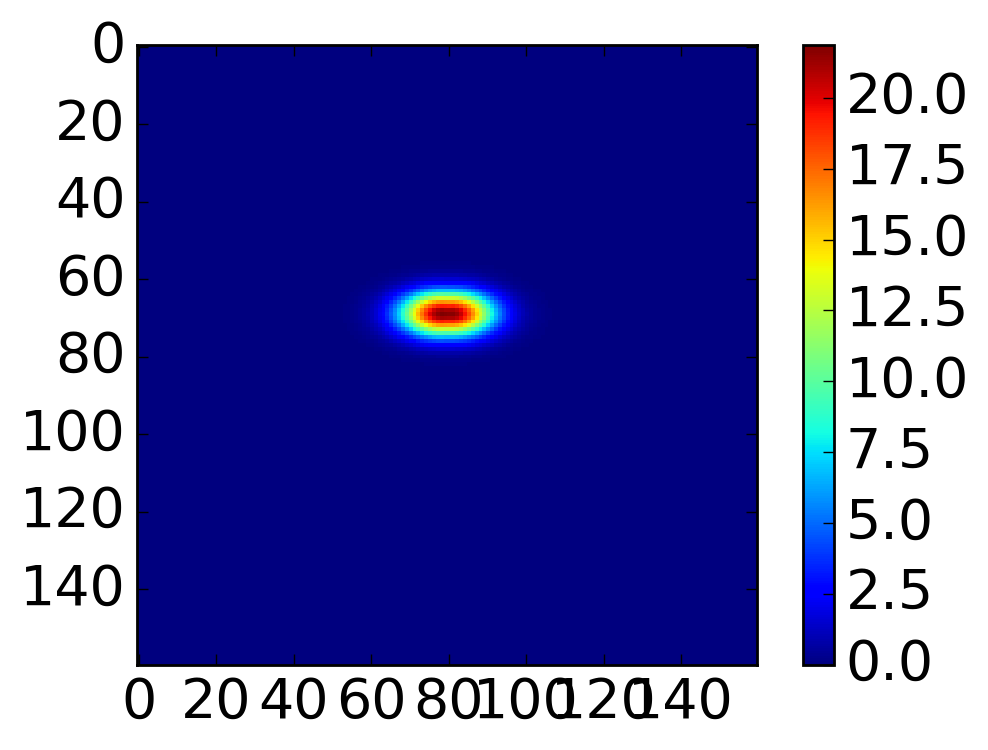

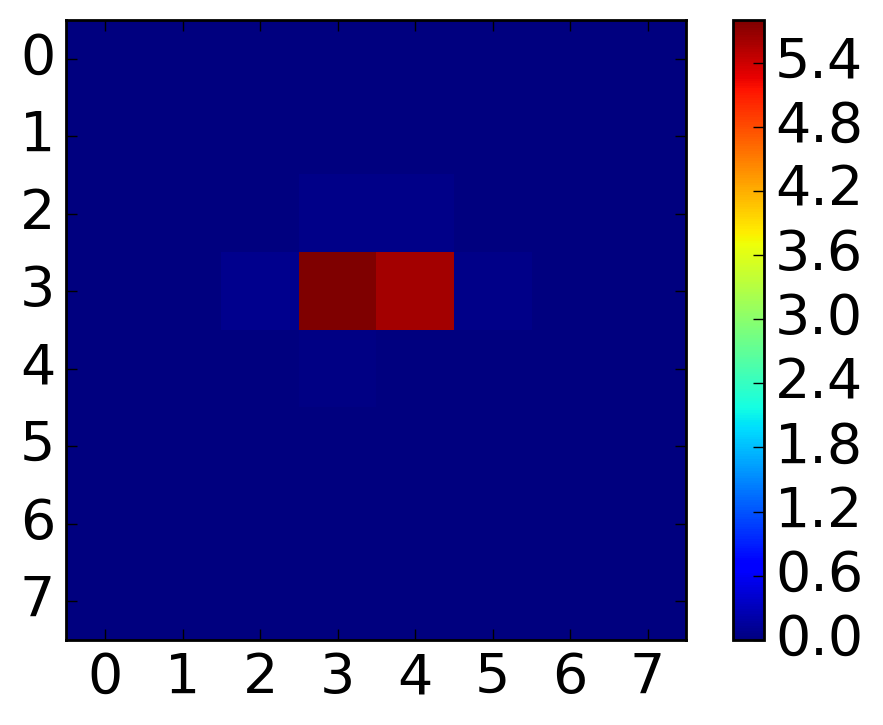

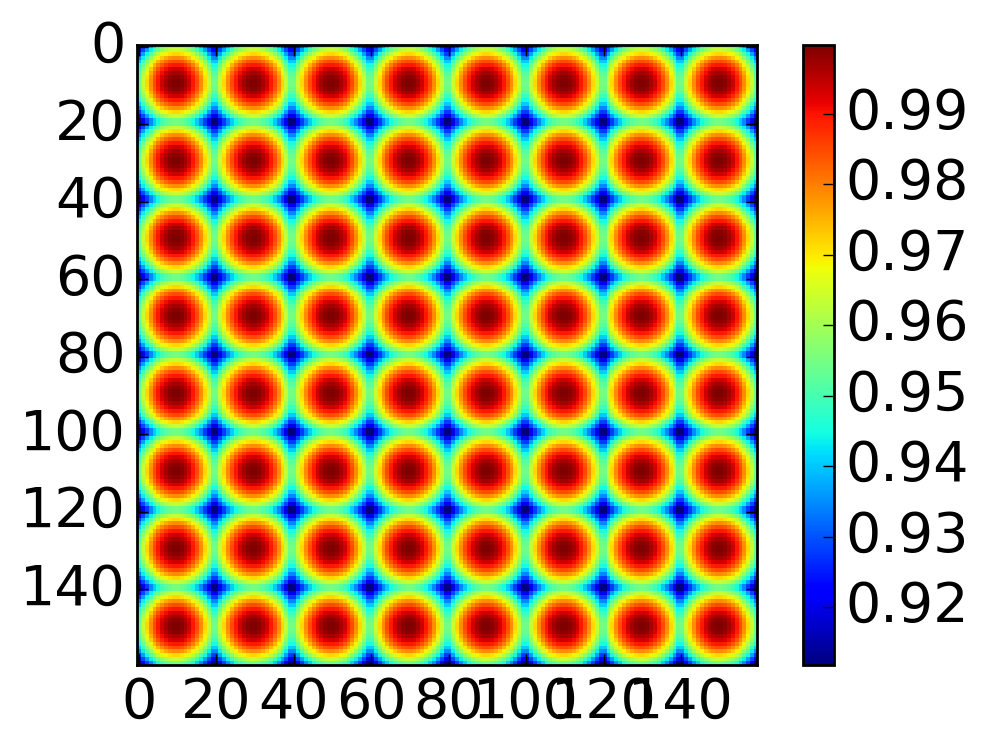

In [6]:
i = 14
plt.imshow(Z_first[i]*Resp, interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(Z[i], interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(Resp, interpolation='nearest')
plt.colorbar()
plt.show()

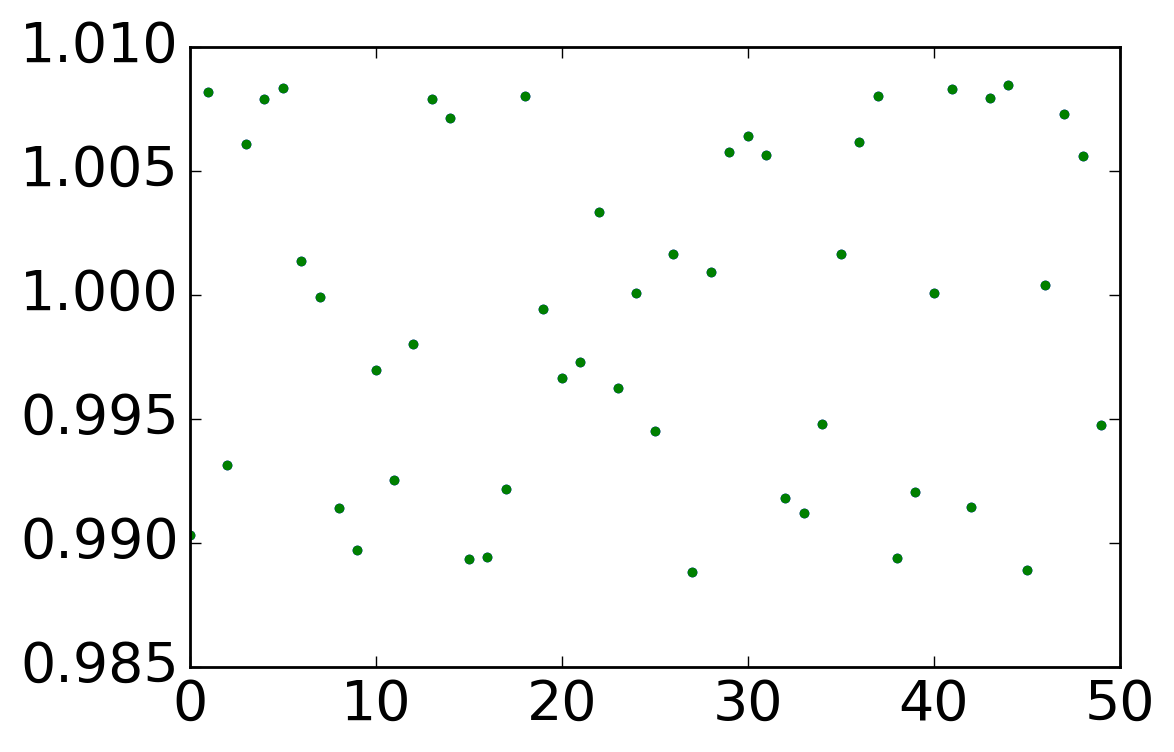

In [7]:
plt.plot(np.sum(Z_first, axis=(1,2))/np.median(np.sum(Z_first, axis=(1,2))), '.')
plt.plot(np.sum(Z, axis=(1,2))/np.median(np.sum(Z, axis=(1,2))), '.')

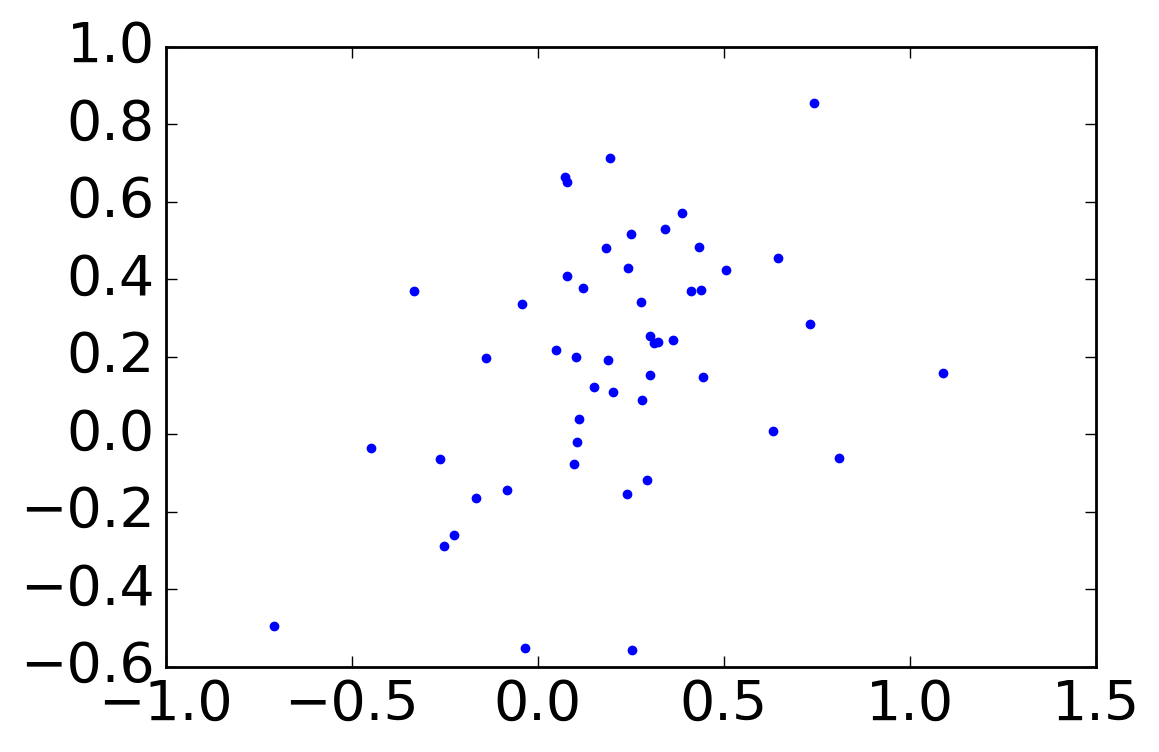

In [8]:
plt.plot(xpos, ypos, '.')

In [9]:
z_tensor = tf.placeholder(tf.float64, (nframes,N,N))
z_err = tf.placeholder(tf.float64, (nframes,N,N))

In [10]:
from scipy import ndimage

In [11]:
def p_operator_orig(image, xshift, yshift, pad, flat, super=False):

        if np.abs(xshift) < 1e-8:
            if np.abs(yshift) < 1e-8:
                return image
        pss = int(pad*ss)
        lx, ly = Zmod.shape[0], Zmod.shape[1]
        xshift_model = xshift*ss
        yshift_model = yshift*ss
        whole_x = np.int(np.floor(xshift_model))
        frac_x = np.mod(xshift_model, 1)
        whole_y = np.int(np.floor(yshift_model))
        frac_y = np.mod(yshift_model, 1)


        ur = frac_x*frac_y
        ul = (1-frac_x)*(frac_y)
        lr = frac_x*(1-frac_y)
        ll = (1-frac_x)*(1-frac_y)



        output = np.zeros_like(Z[0])

        #if pss+whole_x < 0:
        #    return output
        #if pss + whole_x + lx >= len(output[:,0])*ss:
        #    return output
        #if pss + whole_y < 0:
        #    return output
        #if pss + whole_y + ly >= len(output[0])*ss:
        #    return output
        
        #print(pss, whole_x, M, pss, lx, whole_x)

        paddings = [[pss +whole_x, M-pss-lx-whole_x], [pss +whole_y, M-pss-whole_y-ly]]
        #print(np.shape(image))
        output = np.pad(ll*image, paddings, 'constant')
        paddings = [[pss +whole_x+1, M-pss-lx-whole_x-1], [pss +whole_y, M-pss-whole_y-ly]]
        output += np.pad(lr*image, paddings, 'constant')
        paddings = [[pss +whole_x, M-pss-lx-whole_x], [pss +whole_y+1, M-pss-whole_y-ly-1]]
        output += np.pad(ul*image, paddings, 'constant')
        paddings = [[pss +whole_x+1, M-pss-lx-whole_x-1], [pss +whole_y+1, M-pss-whole_y-ly-1]]
        output += np.pad(ur*image, paddings, 'constant')
        
        output_flat = output * flat
        
        if super == True:
            return output_flat
        
        tmp = np.reshape(output_flat, (N, ss, N, ss))
        output = np.nansum(tmp, axis=(1, 3))/ss/ss

        return output

In [38]:
x_cm_list = np.zeros((nframes,2))
for i in range(nframes):
    x_cm = ndimage.measurements.center_of_mass(Z[i])
    x_cm_list[i] = x_cm - np.array([3.54, 3.54])

#print(x_cm_list[:,1]-xpos)

In [39]:
Zmod = 12*(1/(2*np.pi*sigma_x*sigma_y) * np.exp(-((Xmod)**2/(2*sigma_x**2)
     + (Ymod)**2/(2*sigma_y**2))))[2*ss:6*ss, 2*ss:6*ss]

real_rsp = calc_resp_orig([-0.20, 0.0, 1.0])

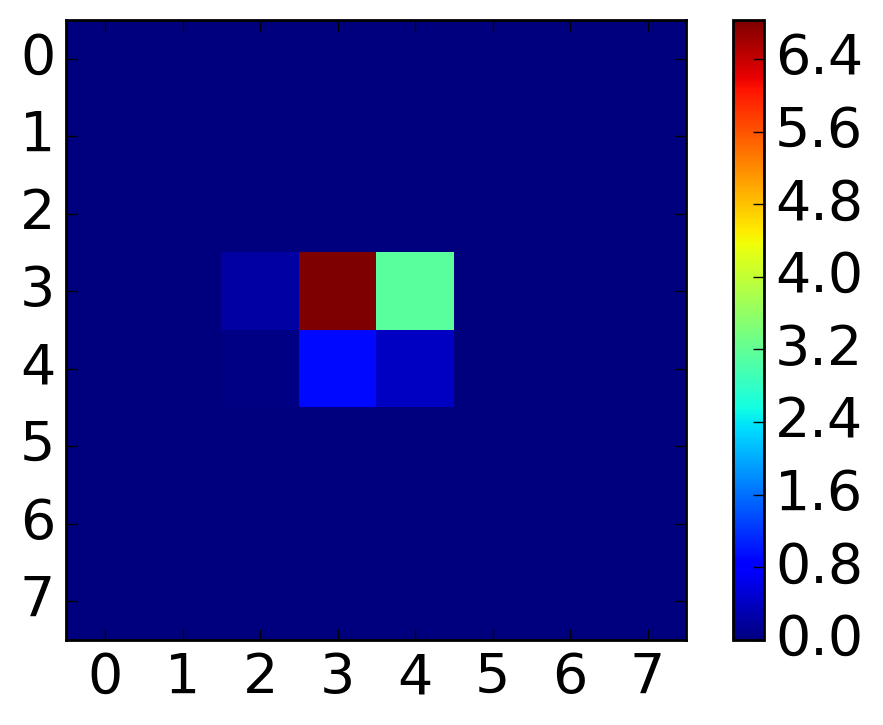

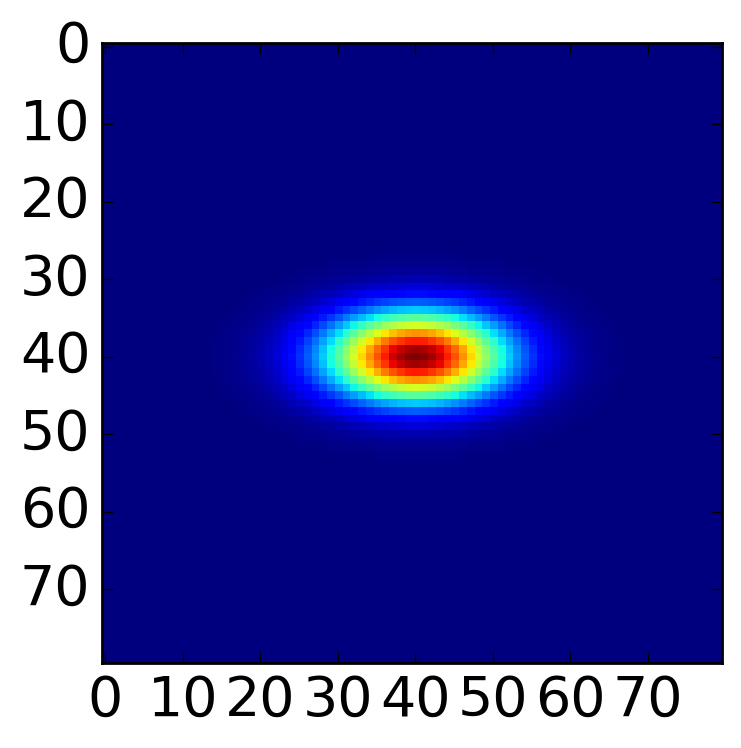

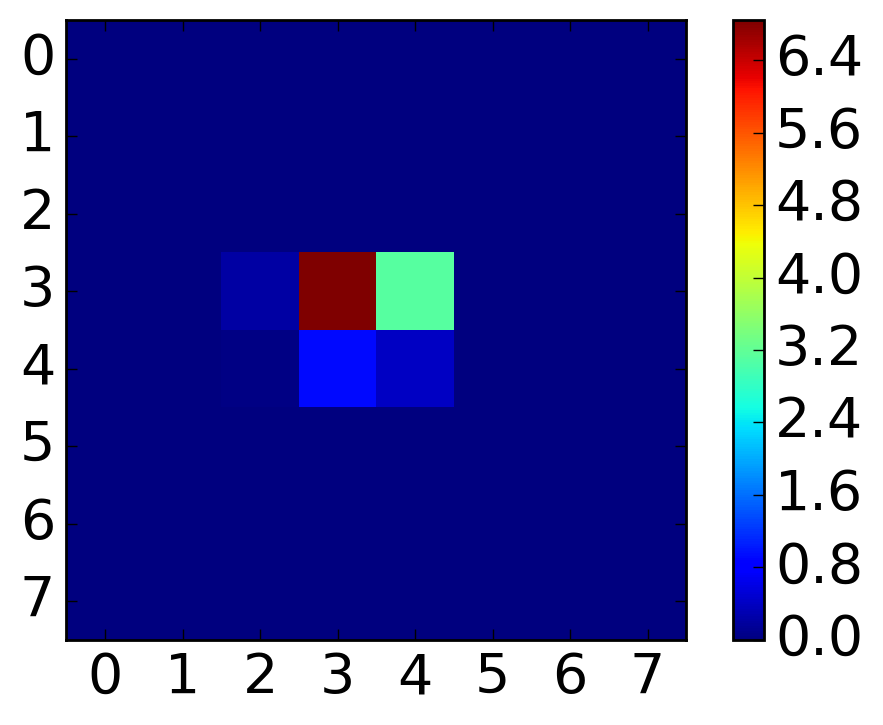

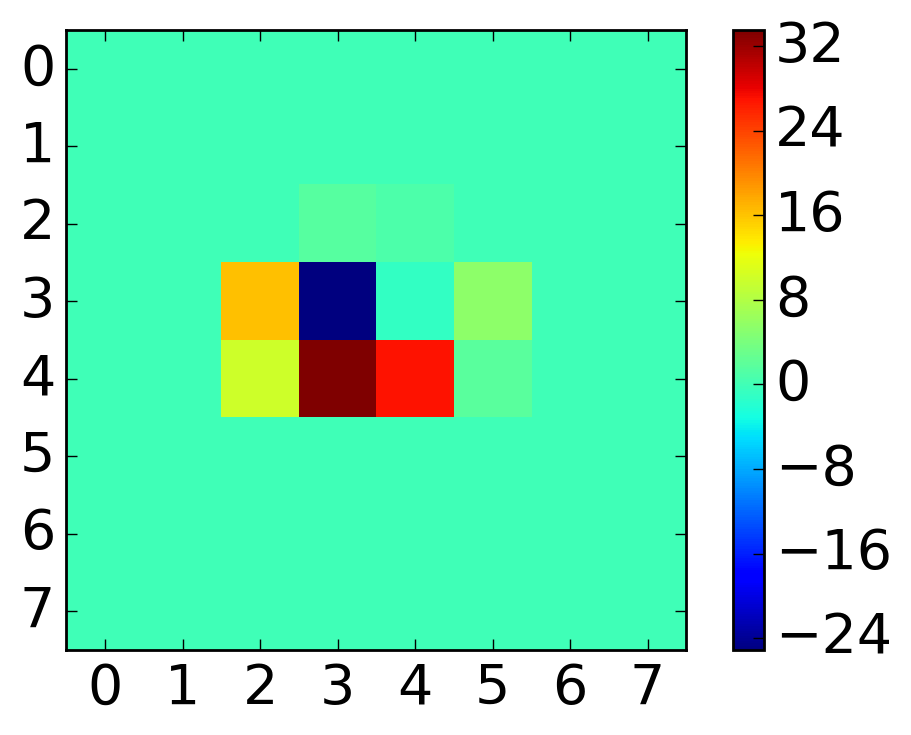

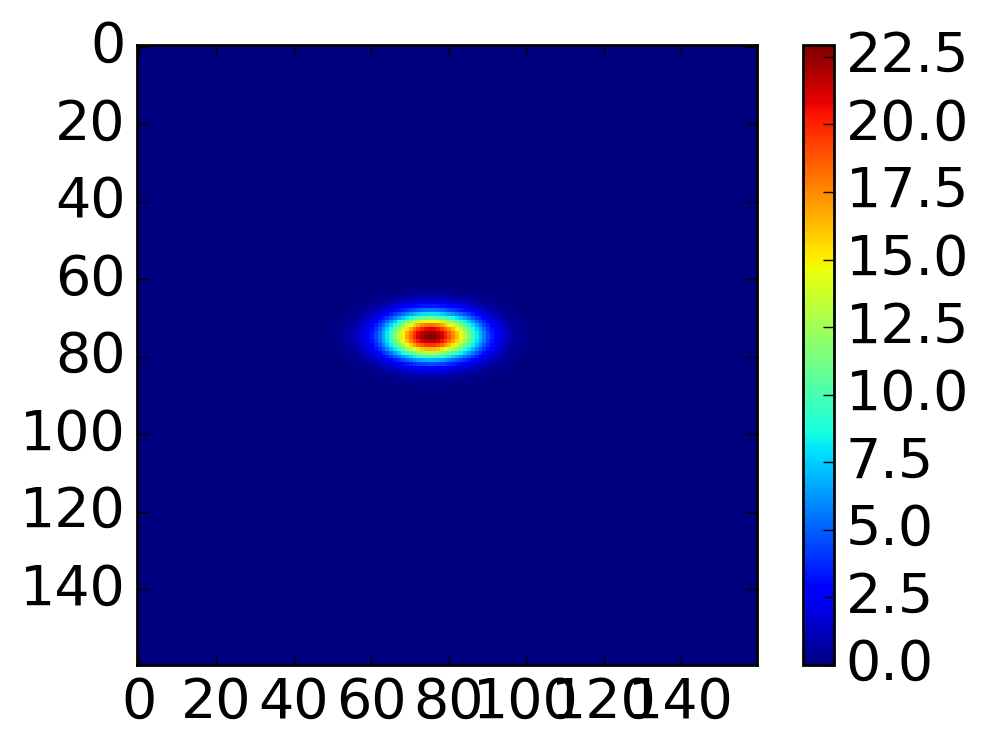

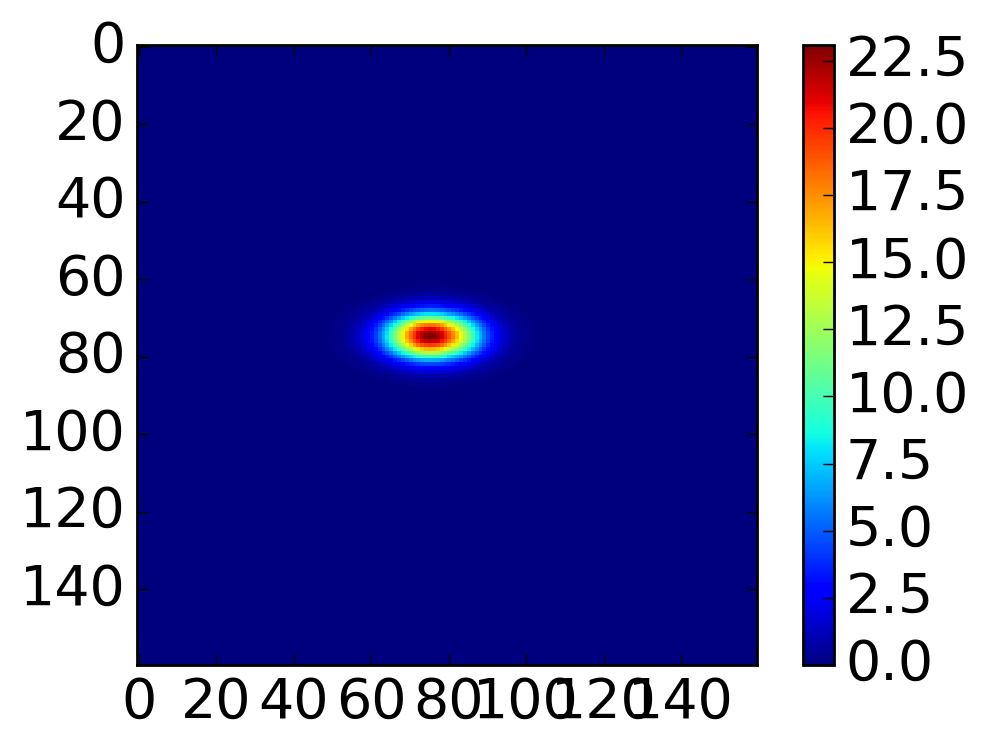

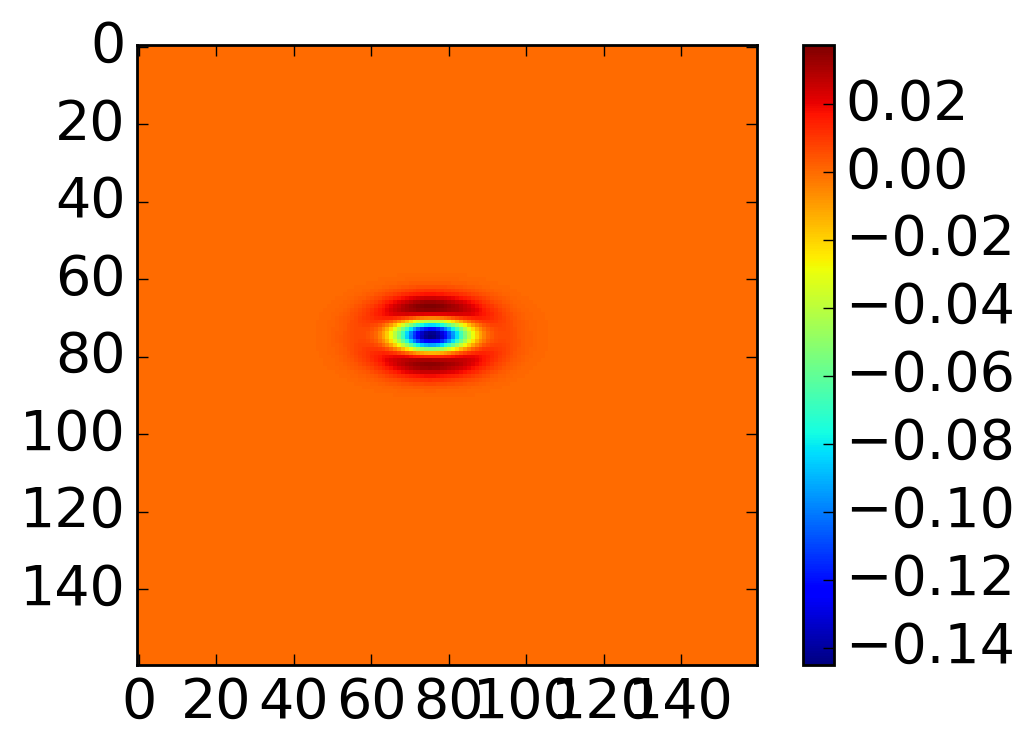

(74.78218879959218, 75.48404981488311)
(74.7821047792735, 75.48418312213676)
3391684.1439303826


In [40]:
k  = 12
model = fluxval[k]*p_operator_orig(Zmod, ypos[k], xpos[k], 2, real_rsp)

model_super = fluxval[k]*p_operator_orig(Zmod, ypos[k], xpos[k], 2, real_rsp, super=True)


#model = 1.0*(p_operator_orig(Zmod, x_cm_list[1,0], x_cm_list[1,1], 2, np.ones((M,M)))+
#             p_operator_orig(Zmod, x_cm_list[1,0]+0.8*10, x_cm_list[1,1]+0.8*10, 2, np.ones((M,M)))+
#             p_operator_orig(Zmod, x_cm_list[1,0]-0.8*10, x_cm_list[1,1]-0.8*10, 2, np.ones((M,M)))+
#             p_operator_orig(Zmod, x_cm_list[1,0]+1.1*10, x_cm_list[1,1]-1.1*10, 2, np.ones((M,M)))+
#             p_operator_orig(Zmod, x_cm_list[1,0]-1.1*10, x_cm_list[1,1]+1.1*10, 2, np.ones((M,M))))

           
plt.imshow(model, interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(Zmod, interpolation='nearest')
plt.show()

plt.imshow(Z[k], interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow((model-Z[k])/Zerr[k], interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(model_super, interpolation='nearest')
plt.colorbar()
plt.show()


plt.imshow(Z_first[k], interpolation='nearest')
plt.colorbar()
plt.show()

plt.imshow(model_super-Z_first[k], interpolation='nearest')
plt.colorbar()
plt.show()


print(ndimage.measurements.center_of_mass(Z_first[k]))
print(ndimage.measurements.center_of_mass(model_super))

print(np.sum(((model-Z[k])/Zerr)**2))

In [167]:
#amp = tf.Variable(0.002*tf.ones(nframes, dtype=tf.float64))
#z_mod = tf.Variable(Zmod*tf.ones((Zmod.shape[0],Zmod.shape[1]), dtype=tf.float64))
#flat = tf.Variable(np.array([-0.0, 0.0, 1.0]),dtype=tf.float64)
#pos = tf.Variable(np.array([xpos, ypos]).T*tf.ones((nframes,2), dtype=tf.float64))

#amp = tf.Variable(0.002*tf.ones(nframes, dtype=tf.float64))
#z_mod = tf.Variable(Zmod*tf.ones((Zmod.shape[0],Zmod.shape[1]), dtype=tf.float64))
#flat = tf.Variable(np.array([-0.2, 0.0, 1.0]),dtype=tf.float64)
#pos = tf.Variable(np.array([xpos, ypos]).T*tf.ones((nframes,2), dtype=tf.float64))

amp = tf.Variable(params[1], dtype=tf.float64)
z_mod = tf.Variable(params[2], dtype=tf.float64)
flat = tf.Variable(params[3],dtype=tf.float64)
pos = tf.Variable(params[0], dtype=tf.float64)

In [42]:
def p_operator(image, xshift, yshift, pad, flat):
        #print(tf.shape(image))
        
        


        pss = int(pad*ss)
        lx, ly = Zmod.shape[0], Zmod.shape[1]
        xshift_model = xshift*ss
        yshift_model = yshift*ss
        whole_x = tf.cast(tf.floor(xshift_model), tf.int32)
        frac_x = np.mod(xshift_model, 1)
        whole_y = tf.cast(tf.floor(yshift_model), tf.int32)
        frac_y = np.mod(yshift_model, 1)


        ur = frac_x*frac_y
        ul = (1-frac_x)*(frac_y)
        lr = frac_x*(1-frac_y)
        ll = (1-frac_x)*(1-frac_y)




        output = np.zeros_like(Zmod)
        '''
        if pss+whole_x < 0:
            return output
        if pss + whole_x + lx >= len(output[:,0]):
            return output
        if pss + whole_y < 0:
            return output
        if pss + whole_y + ly >= len(output[0]):
            return output
        '''
        #print(pss, whole_x, M, whole_y, ly)
        
        #if tf.min(paddings) < 0:
        #    return tf.zeros((N,N))
        
        paddings = [[pss +whole_x, M-pss-lx-whole_x], [pss +whole_y, M-pss-whole_y-ly]]
        output = tf.pad(ll*image, paddings, 'constant')
        paddings = [[pss +whole_x+1, M-pss-lx-whole_x-1], [pss +whole_y, M-pss-whole_y-ly]]
        output += tf.pad(lr*image, paddings, 'constant')
        paddings = [[pss +whole_x, M-pss-lx-whole_x], [pss +whole_y+1, M-pss-whole_y-ly-1]]
        output += tf.pad(ul*image, paddings, 'constant')
        paddings = [[pss +whole_x+1, M-pss-lx-whole_x-1], [pss +whole_y+1, M-pss-whole_y-ly-1]]
        output += tf.pad(ur*image, paddings, 'constant')
        #output[pss + whole_x:pss + whole_x + lx, pss + whole_y:pss + whole_y + ly] += ll*image
        #output[pss + whole_x+1:pss + whole_x+1 + lx, pss + whole_y:pss + whole_y + ly] += lr*image
        #output[pss + whole_x:pss + whole_x + lx, pss + whole_y+1:pss + whole_y+1 + ly] += ul*image
        #output[pss + whole_x+1:pss + whole_x+1 + lx, pss + whole_y+1:pss + whole_y+1 + ly] += ur*image
        #print(np.shape(image[:,0]))
        
        output_flat = tf.multiply(output, flat)
        
        tmp = tf.reshape(output_flat, (N, ss, N, ss))
        output = tf.reduce_sum(tmp, axis=(1, 3))

        return output

In [17]:
def calc_resp(flat):
    X_r = tf.range(-4, 4, 1.0/ss, dtype=tf.float64)
    Y_r = tf.range(-4, 4, 1.0/ss, dtype=tf.float64)
    Xpos = X_r + 0.5/ss - 0.5
    Ypos = Y_r + 0.5/ss - 0.5


    Xpos, Ypos = tf.meshgrid(Xpos, Ypos)


    modposx = -1*tf.abs(tf.mod(Xpos+0.5, 1)-0.5)
    modposy = -1*tf.abs(tf.mod(Ypos+0.5, 1)-0.5)


    Resp =  flat[0] * tf.square(modposx) + 1.0 #- flat[1] * modposx + 1.0
    Resp *= flat[0] * tf.square(modposy) + 1.0 #- flat[1] * modposy + 1.0
    
    return Resp

In [18]:
def calc_resp_orig(flat):
    X_r = np.arange(-4, 4, 1.0/ss)
    Y_r = np.arange(-4, 4, 1.0/ss)
    Xpos = X_r + 0.5/ss - 0.5
    Ypos = Y_r + 0.5/ss - 0.5


    Xpos, Ypos = np.meshgrid(Xpos, Ypos)


    modposx = -1*np.abs(np.mod(Xpos+0.5, 1)-0.5)
    modposy = -1*np.abs(np.mod(Ypos+0.5, 1)-0.5)


    Resp =  flat[0] * np.square(modposx) - flat[1] * modposx + 1.0
    Resp *= flat[0] * np.square(modposy) - flat[1] * modposy + 1.0
    
    return Resp

In [168]:
response = calc_resp(flat)
z_test = [amp[i]*p_operator(z_mod, pos[i,1], pos[i,0], 2, response) for i in range(nframes)]


In [ ]:
nll = 0.5*tf.reduce_sum((tf.divide((z_tensor - z_test), z_err)**2))
#gradient = tf.gradients(nll, [pos, amp, z_mod, flat])
#opt = tf.train.GradientDescentOptimizer(1e-14).minimize(nll, var_list=[pos, amp, z_mod, flat])
#hess = tf.hessians(nll, [pos, amp, z_mod, flat])
#opt = tf.train.AdagradOptimizer(0.005).minimize(nll, var_list=[pos, amp, z_mod, flat])
opt = tf.train.AdamOptimizer(0.001, beta1=0.99, epsilon=1e-8).minimize(nll, var_list=[pos, amp, flat])
init = tf.global_variables_initializer()

In [ ]:
with tf.Session() as session:
    session.run(init)
    
    data = {z_tensor: Z, z_err: Zerr}
    nll_history = []
    for i in range(13000):
        session.run(opt, feed_dict=data)
        nll_history.append(session.run(nll, feed_dict=data))
        #if nll_history[-1] == np.min(nll_history):
        #    params_best = session.run([pos, amp, z_mod, flat])
        if i % 100 == 0:
            print(i, nll_history[-1])
            params = session.run([pos, amp, z_mod, flat])
        if i == 5000:
            params2 = session.run([pos, amp, z_mod, flat])

In [169]:
nll = 0.5*tf.reduce_sum((tf.divide((z_tensor - z_test), z_err)**2))
#gradient = tf.gradients(nll, [pos, amp, z_mod, flat])
#opt = tf.train.GradientDescentOptimizer(1e-14).minimize(nll, var_list=[pos, amp, z_mod, flat])
#hess = tf.hessians(nll, [pos, amp, z_mod, flat])
#opt = tf.train.AdagradOptimizer(0.005).minimize(nll, var_list=[pos, amp, z_mod, flat])
opt1 = tf.train.AdamOptimizer(0.001*0.01, beta1=0.9, epsilon=1e-8).minimize(nll, var_list=[pos, amp])
opt2 = tf.train.AdamOptimizer(0.001*0.01, beta1=0.9, epsilon=1e-8).minimize(nll, var_list=[z_mod])
opt3 = tf.train.AdamOptimizer(0.001*0.01, beta1=0.9, epsilon=1e-8).minimize(nll, var_list=[flat])
init = tf.global_variables_initializer()

In [170]:
with tf.Session() as session:
    session.run(init)
    
    data = {z_tensor: Z, z_err: Zerr}
    nll_history = []

    for i in range(50):
        print(i, 'optimizing flux')
        for i in range(500):
            session.run(opt1, feed_dict=data)
            nll_history.append(session.run(nll, feed_dict=data))
            if i % 499 == 0:
                print(i, nll_history[-1])
        params = session.run([pos, amp, z_mod, flat])
        print(np.max(params[1])/np.min(params[1]))
        
        print('optimizing model')
        for i in range(500):
            session.run(opt2, feed_dict=data)
            nll_history.append(session.run(nll, feed_dict=data))
            if i % 499 == 0:
                print(i, nll_history[-1])
        params = session.run([pos, amp, z_mod, flat])
        
        print('optimizing flat')
        for i in range(500):
            session.run(opt3, feed_dict=data)
            nll_history.append(session.run(nll, feed_dict=data))
            if i % 499 == 0:
                print(i, nll_history[-1])   
        params = session.run([pos, amp, z_mod, flat])
        print(params[3])
        

0 optimizing flux
0 106026.58247959518
499 1315.989709149678
1.0018891410339013
optimizing model
0 1327.057521958865
499 1309.697654421755
optimizing flat
0 1309.7084595097622
499 1309.6968203907202
[-0.19257154  0.          1.        ]
1 optimizing flux
0 1308.8416574312928
499 1307.4893612319886
1.0018879179276896
optimizing model
0 1307.2966973841974
499 1299.3897714770983
optimizing flat
0 1299.3892123932142
499 1299.388905806332
[-0.1925737  0.         1.       ]
2 optimizing flux
0 1298.3914084610637
499 1297.166459197306
1.0018871919760621
optimizing model
0 1296.9832582987558
499 1288.691435748834
optimizing flat
0 1288.6921584508486
499 1288.690377285514
[-0.19257607  0.          1.        ]
3 optimizing flux
0 1287.6808720884026
499 1286.7632943909696
1.0018867106774225
optimizing model
0 1286.5790308789879
499 1278.3431946049986
optimizing flat
0 1278.3434752957867
499 1278.3430323441312
[-0.19257701  0.          1.        ]
4 optimizing flux
0 1277.448871537424
499 1277.284

KeyboardInterrupt: 

In [ ]:
optim = tf.contrib.opt.ScipyOptimizerInterface(loss=nll,
                                                   method='L-BFGS-B')

nll_history = []

data = {z_tensor: Z, z_err: Zerr}

with tf.Session() as sess:
    # initialize
    sess.run(fetches=tf.global_variables_initializer())

    for i in range(10):
        # gradient step
        optim.minimize(session=sess, feed_dict=data)
        # sess.run(fetches=train_op, feed_dict={x: x_obs})

        # update loss
        nll_history.append(sess.run(fetches=nll, feed_dict=data))

    params = sess.run([pos, amp, z_mod])
    pred = sess.run(model, feed_dict=data)

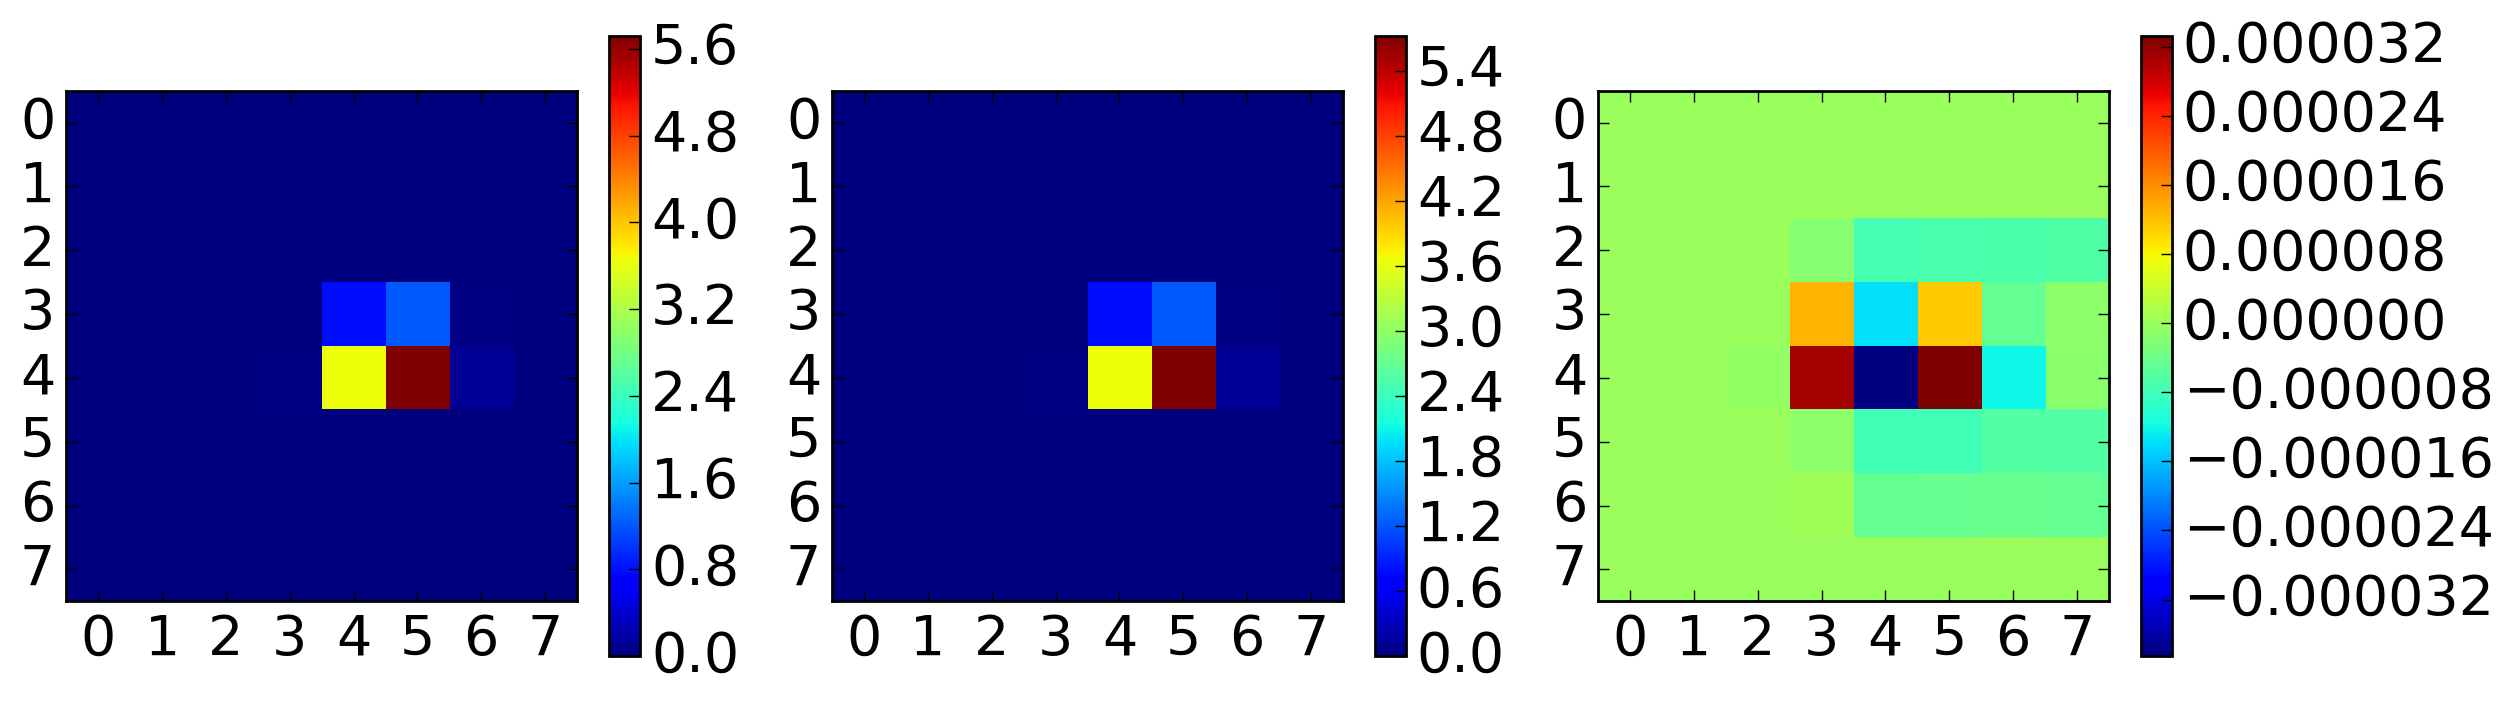

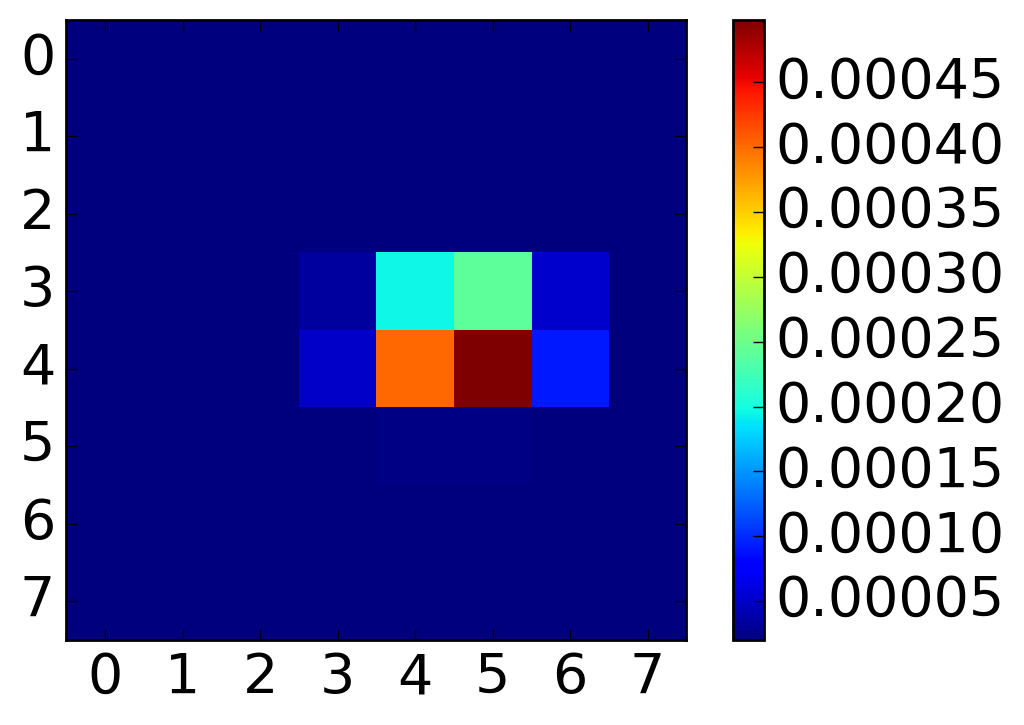

1.674672893724059


In [171]:
j = 49
rsp = calc_resp_orig(params[3])
model = ss*ss*params[1][j]*p_operator_orig(params[2], params[0][j][1], params[0][j][0], 2, rsp)
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.imshow(model, interpolation='nearest')
plt.colorbar()
plt.subplot(132)
plt.imshow(Z[j], interpolation='nearest')
plt.colorbar()
plt.subplot(133)
plt.imshow(model-Z[j], interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(Zerr[j], interpolation='nearest')
plt.colorbar()
plt.show()
print(np.sum(((model-Z[j])/Zerr[j])**2))

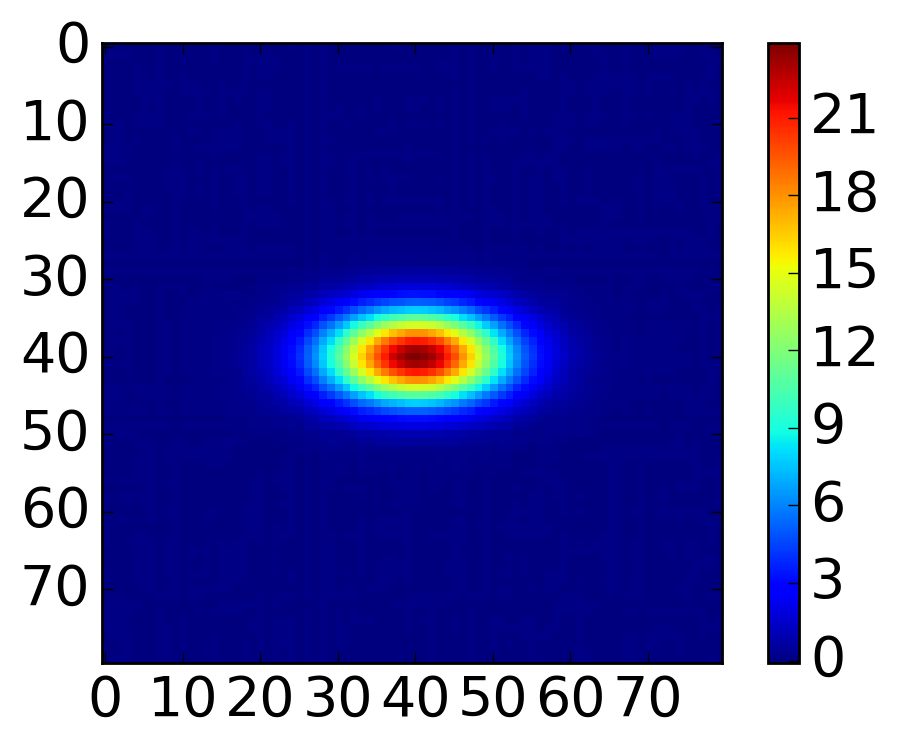

In [158]:
plt.imshow(params[2], interpolation='nearest')
plt.colorbar()

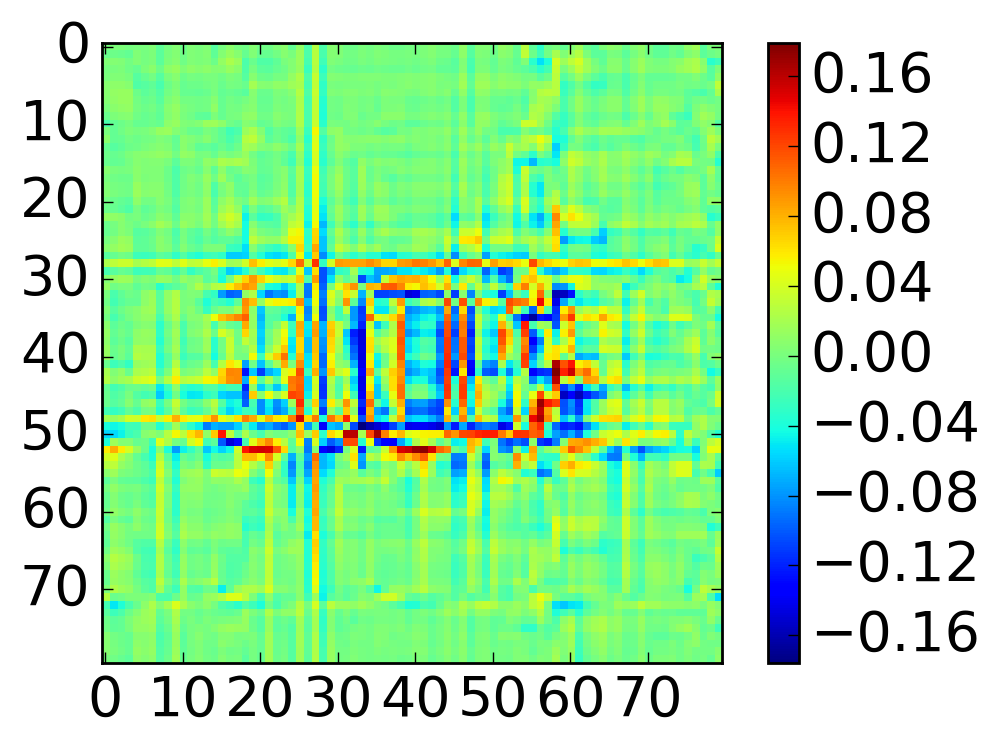

In [172]:
plt.imshow(Zmod-params[2], interpolation='nearest')
plt.colorbar()


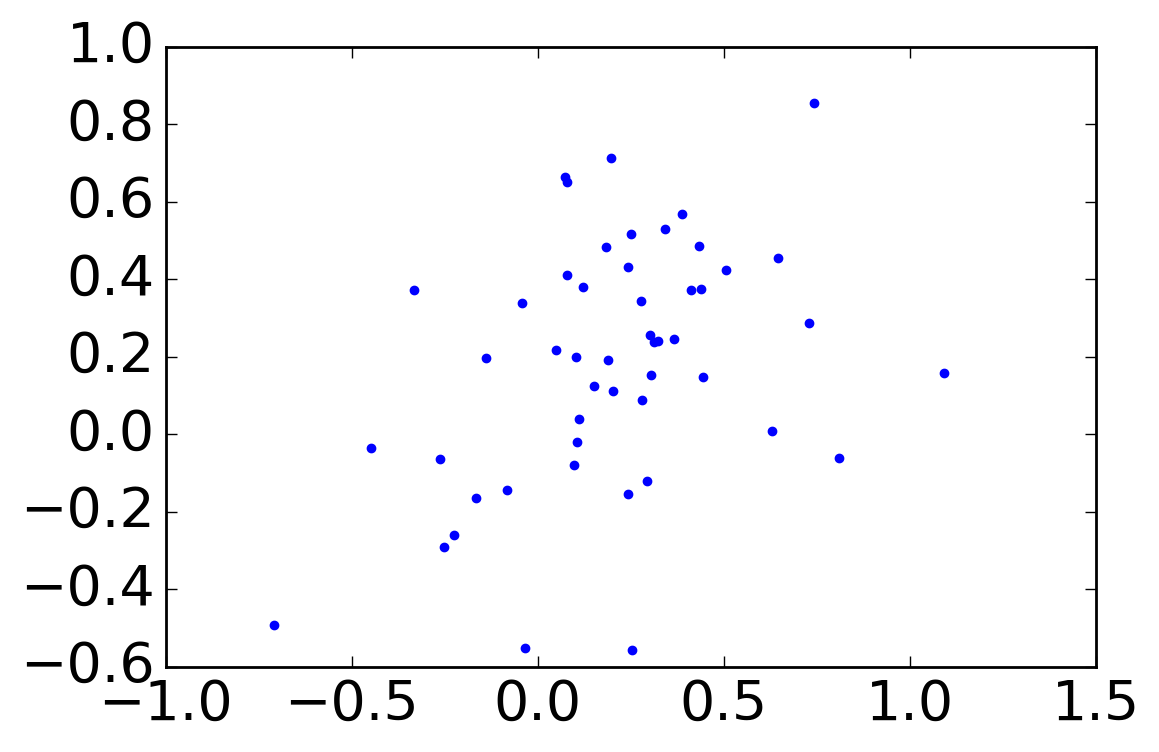

In [173]:
plt.plot(params[0][:,0], params[0][:,1], '.')
plt.show()

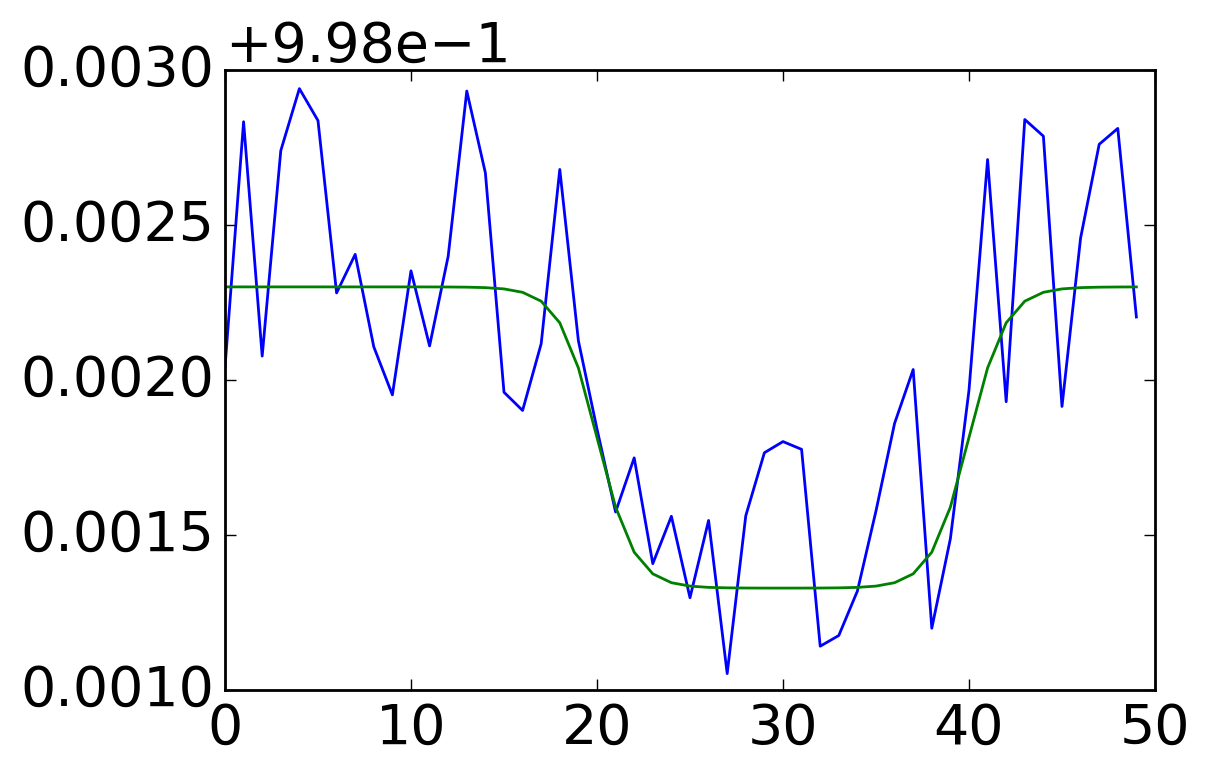

In [174]:
Xs = np.sum(Z_first, axis=(1,2))/np.median(np.sum(Z_first, axis=(1,2)))

plt.plot(params[1]/np.median(params[1]))
#plt.plot(Xs)
plt.plot(fluxval+0.0003)
plt.show()

In [147]:
print(xpos)

[-0.44721254  0.34121493  0.15136578  0.12089878  0.24212465 -0.70847059
  0.30089145 -0.25232893 -0.08149224 -0.26143733 -0.13832827 -0.16700437
 -0.22496347  0.18342523 -0.03352448  0.80939157  0.09711138  0.28011532
  0.25262965  0.19525241  0.10358928  0.04968925 -0.04213867  0.18952161
  0.36490298  0.30254626  0.73088272  0.11081561  0.07290873  0.07933178
  0.38870806 -0.33133838  0.20263711  0.74256837  0.44453805  0.07906655
  0.41114007  0.43238043  0.6311624   0.24099103  0.32333571  0.50592797
  0.29398944  0.2517931   0.64575058  0.10463321  0.31246299  0.43833597
  0.27717684  1.09068271]


In [177]:
rsp = calc_resp_orig(params[3])
real_rsp = calc_resp_orig([-0.20, 0.0, 1.0])
chi2 = np.zeros(50)
for j in range(50):
    model = ss*ss*params[1][j]*p_operator_orig(params[2], params[0][j][1], params[0][j][0], 2, rsp)
    #real_ = ss*ss*fluxval[j]*p_operator_orig(Zmod, ypos[j], xpos[j], 2, real_rsp)/1100
    chi2[j] = np.sum(((model-Z[j])/Zerr[j])**2)
    #print(np.sum(((real_-Z[j])/Zerr[j])**2))

(-0.005, 0.005)

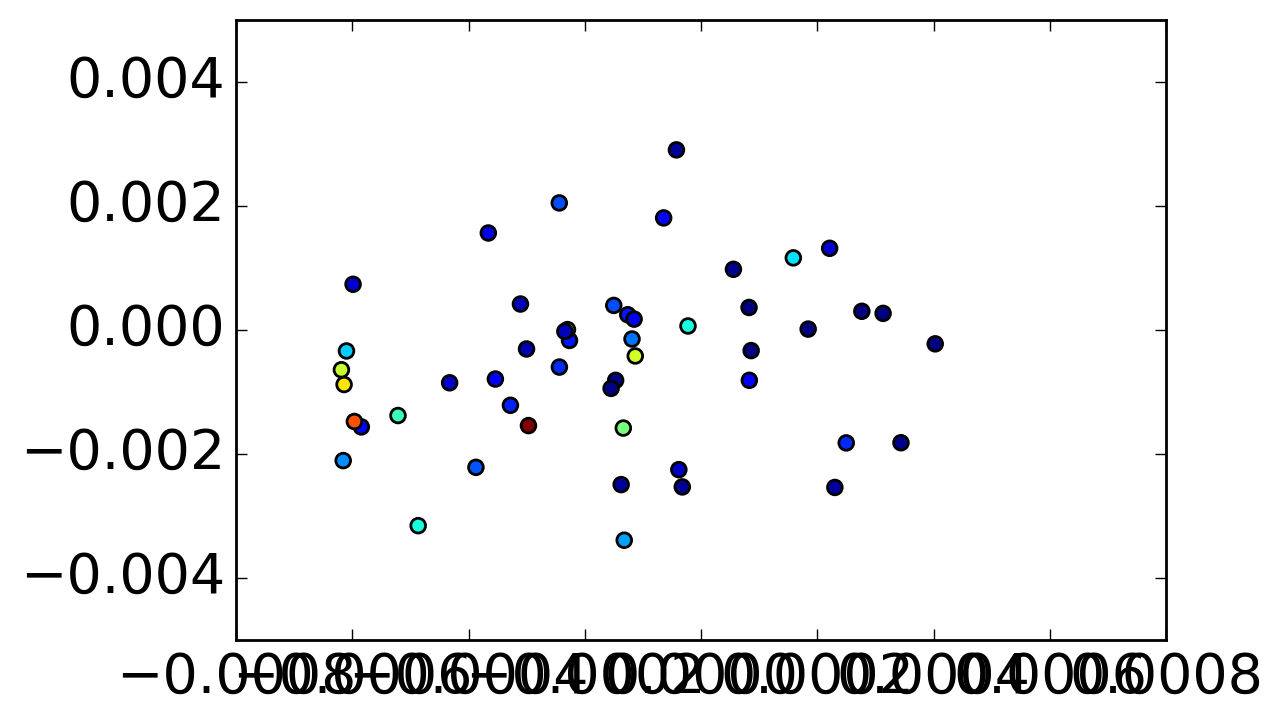

In [187]:
plt.scatter(xpos-params[0][:,0], ypos-params[0][:,1], c=chi2, s=28)
plt.xlim(-0.0008, 0.0008)
plt.ylim(-0.005, 0.005)

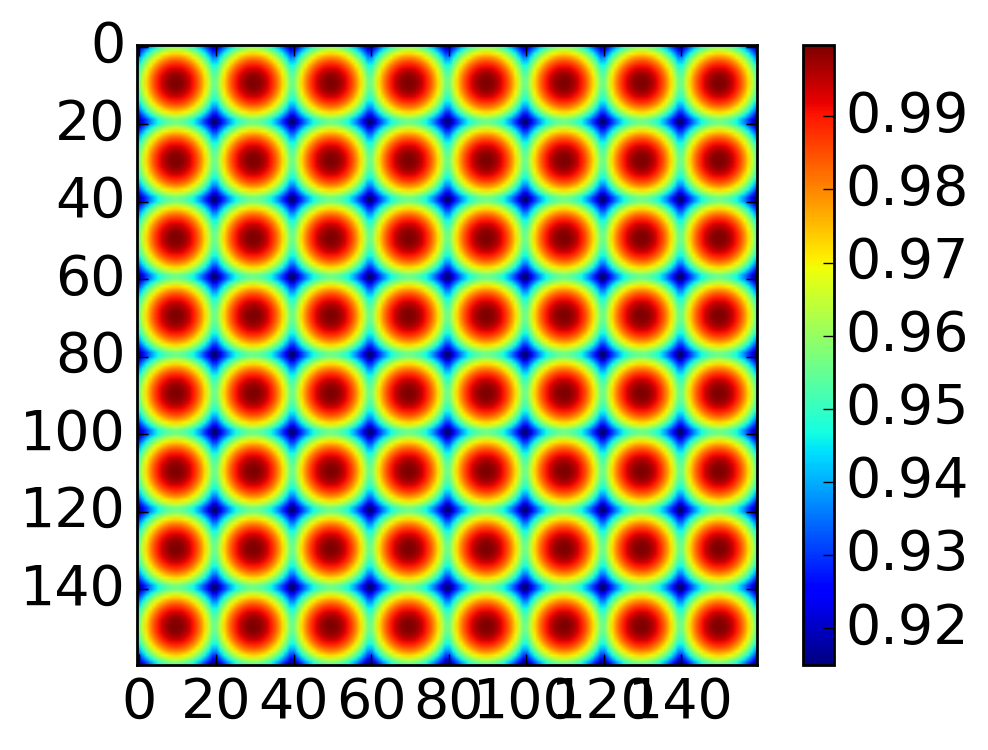

In [179]:
plt.imshow(rsp)
plt.colorbar()

In [180]:
print(chi2, np.sum(chi2))

[2.92273661e-01 4.84290455e+01 3.79057270e+01 5.02055769e+01
 2.40334399e+02 6.35266624e+01 1.60372238e+02 1.70245153e+01
 1.03520624e-01 1.13163631e+00 2.45820050e-01 4.52539301e+00
 8.30576713e+01 9.09143355e+01 9.09586878e+01 3.63839702e+01
 4.83755635e+01 1.42692516e+02 4.03769308e+01 2.13582233e+01
 3.57616379e+01 4.01996049e+01 1.59430255e+01 1.60933061e+01
 2.34777033e+00 7.81747994e+01 2.51711661e+00 1.08751699e+01
 3.12530454e+01 1.45800677e+02 6.44960618e+00 7.09742393e+00
 2.87644669e+01 4.37914339e-01 5.80502382e+01 2.17490721e+01
 4.12739538e+00 6.81364331e+01 1.77542610e-01 1.31265378e+01
 1.01381141e+02 1.19899257e+02 1.62509001e+01 9.89400565e+01
 2.73547112e+01 1.39486266e+01 3.13555965e+01 5.79700287e+00
 1.97892330e+02 1.67467289e+00] 2379.7917845971338


(0.998, 1.002)

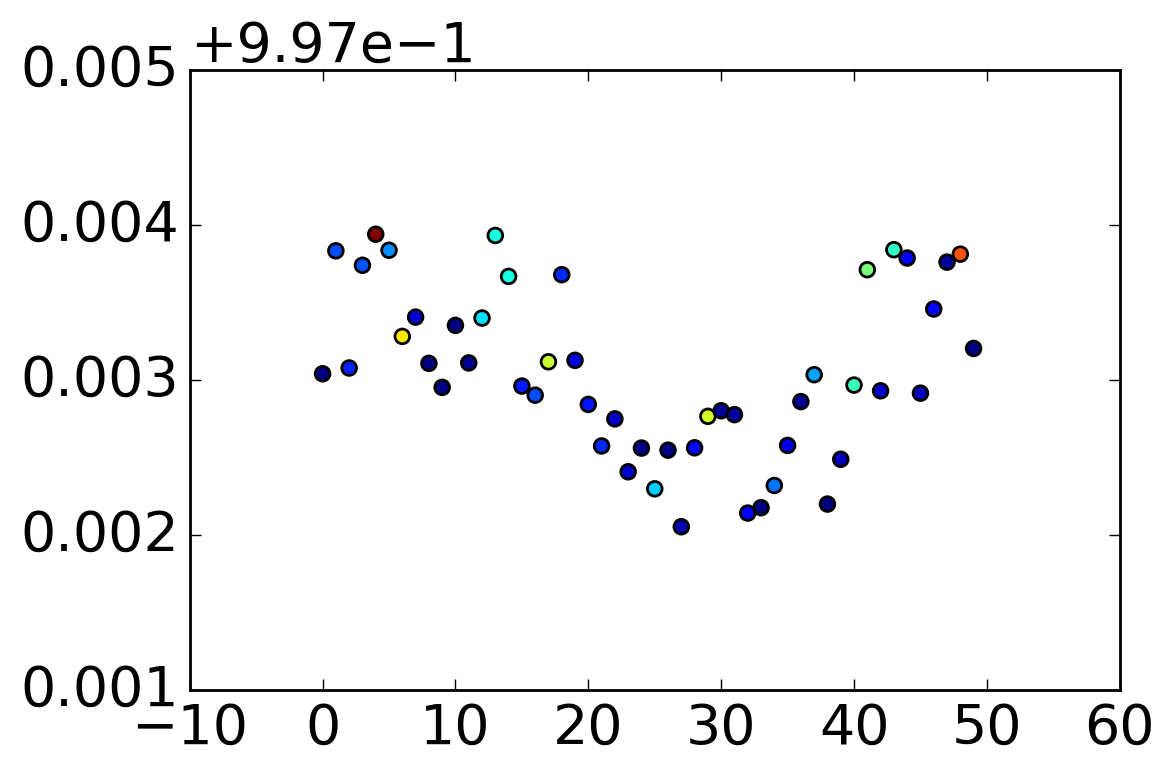

In [181]:
plt.scatter(np.arange(nframes), params[1]/np.median(params[1]), c=chi2, s=28)
plt.ylim(0.998, 1.002)